In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/durbin_data.csv"

In [0]:
df = pd.read_csv(path)

In [39]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [40]:
df.head()

,X1,X2,X3,Y
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
target_col = "Y"

In [0]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [0]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels 

In [0]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [45]:
results = model.fit()
results.params

const    2.708949
X1       0.044059
X2       0.199287
X3       0.006882
dtype: float64

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.88e-69
Time:                        04:28:44   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [0]:
X_test = sm.add_constant(X_with_constant)

In [0]:
y_pred = results.predict(X_with_constant)

In [0]:
residual = y_train - y_pred

In [0]:
residual_df = pd.DataFrame(residual, columns=["ei"]).reset_index(drop=True)

In [51]:
residual_df.head()

,ei
0,-2.391498
1,0.308038
2,0.483493
3,-2.006105
4,-3.592562


In [0]:
residual_df['ei_square'] = np.square(residual_df['ei'])

In [53]:
sum_of_squared_residuals = residual_df.sum()["ei_square"]
sum_of_squared_residuals

347.1097250468101

In [54]:
residual_df.head()

,ei,ei_square
0,-2.391498,5.719262
1,0.308038,0.094888
2,0.483493,0.233765
3,-2.006105,4.024456
4,-3.592562,12.906499


In [0]:
residual_df['ei_minus_1'] = residual_df['ei'].shift()

In [56]:
residual_df.head()

,ei,ei_square,ei_minus_1
0,-2.391498,5.719262,NaN
1,0.308038,0.094888,-2.391498
2,0.483493,0.233765,0.308038
3,-2.006105,4.024456,0.483493
4,-3.592562,12.906499,-2.006105


In [57]:
residual_df.tail()

,ei,ei_square,ei_minus_1
135,0.992998,0.986044,1.785357
136,0.425400,0.180965,0.992998
137,0.017150,0.000294,0.425400
138,0.480828,0.231195,0.017150
139,-2.414448,5.829558,0.480828


In [0]:
residual_df.dropna(inplace=True)

In [59]:
residual_df.shape

(139, 3)

In [0]:
residual_df['ei_sub_ei_minus_1'] = residual_df['ei'] - residual_df['ei_minus_1'] 

In [0]:
residual_df['square_of_ei_sub_ei_minus_1'] = np.square(residual_df['ei_sub_ei_minus_1'])

In [62]:
residual_df.head()

,ei,ei_square,ei_minus_1,ei_sub_ei_minus_1,square_of_ei_sub_ei_minus_1
1,0.308038,0.094888,-2.391498,2.699536,7.287496
2,0.483493,0.233765,0.308038,0.175455,0.030784
3,-2.006105,4.024456,0.483493,-2.489598,6.198097
4,-3.592562,12.906499,-2.006105,-1.586457,2.516846
5,-0.305778,0.093500,-3.592562,3.286784,10.802948


In [63]:
sum_of_squared_of_difference_residuals = residual_df.sum()["square_of_ei_sub_ei_minus_1"]
sum_of_squared_of_difference_residuals

793.3116126261241

In [0]:
dw = sum_of_squared_of_difference_residuals/sum_of_squared_residuals

In [65]:
dw

2.2854779206175815

# No autocorrelation of residuals

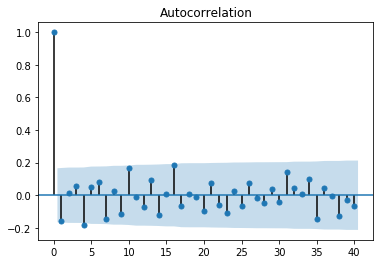

In [66]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()